In [157]:
import requests
import os

from dotenv import load_dotenv

# put .env in the .gitignore
load_dotenv()
api_key = os.environ['polygenio_key']


# First I retreived the first year of data (1/1/2023 - 1/1/2024)

## Getting the Stocks data for Apple
I picked Apple because they are known for being a fairly 'safe' stock

In [15]:
apple_stocks_url = 'https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2023-01-01/2024-07-07?adjusted=true&sort=asc&apiKey=' + api_key

print(apple_stocks_url)

https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2023-01-01/2024-07-07?adjusted=true&sort=asc&apiKey=TBTtUMKY5QJR0s4wkB2GvyyT0dPe90eH


In [16]:
apple_response = requests.get(apple_stocks_url)
# Should be 200 if the request worked
apple_response

<Response [200]>

In [17]:
apple_data = apple_response.json()
apple_data
apple = apple_data['results']

## Getting the Stocks data for Luxurban Hotels
I just thought their company sounded cool. They lease entire hotels on a long-term basis 
and rent out hotel rooms in the property it leases


In [18]:
luxh_stocks_url = 'https://api.polygon.io/v2/aggs/ticker/LUXH/range/1/day/2023-01-01/2024-07-07?adjusted=true&sort=asc&apiKey=' + api_key
luxh_response = requests.get(luxh_stocks_url)
luxh_data = luxh_response.json()
luxh = luxh_data['results']

## Getting the Stocks data for GameStop
A few of my friends owned/bought GameStop Stocks a few years ago when the stock blew up, so I thought it would be fun to see how this stock preforms

In [19]:
gme_stocks_url = 'https://api.polygon.io/v2/aggs/ticker/GME/range/1/day/2023-01-01/2024-07-07?adjusted=true&sort=asc&apiKey=' + api_key
gme_response = requests.get(gme_stocks_url)
gme_data = gme_response.json()
gme = gme_data['results']

## Getting the Stocks data for Lululemon
I like working out and lululemon has quickly become a top athletic brand in both mens and womens clothing


In [20]:
lulu_stocks_url = 'https://api.polygon.io/v2/aggs/ticker/LULU/range/1/day/2023-01-01/2024-07-07?adjusted=true&sort=asc&apiKey=' + api_key
lulu_response = requests.get(lulu_stocks_url)
lulu_data = lulu_response.json()
lulu = lulu_data['results']

## Getting the Foreign Exchange between the Euro and the USD

In [21]:
eurusd_forex_url = 'https://api.polygon.io/v2/aggs/ticker/C:EURUSD/range/1/day/2023-01-01/2024-07-07?adjusted=true&sort=asc&apiKey=' + api_key
eurusd_response = requests.get(eurusd_forex_url)
eurusd_data = eurusd_response.json()
eurusd = eurusd_data['results']

## Getting an ETF
I chose DFSI because it sounds interesting

In [22]:
dfsi_forex_url = 'https://api.polygon.io/v2/aggs/ticker/DFSI/range/1/day/2023-01-01/2024-07-07?adjusted=true&sort=asc&apiKey=' + api_key
dfsi_response = requests.get(dfsi_forex_url)
dfsi_data = dfsi_response.json()
dfsi = dfsi_data['results']

## Getting an Index
I pick Nasdaq-100 because it was suggested in our chat

In [23]:
ndx_forex_url = 'https://api.polygon.io/v2/aggs/ticker/I:NDX/range/1/day/2023-01-01/2024-07-07?sort=asc&apiKey=' + api_key
ndx_response = requests.get(ndx_forex_url)
ndx_data = ndx_response.json()
ndx = ndx_data['results']

In [24]:
ndxt_forex_url = 'https://api.polygon.io/v2/aggs/ticker/I:NDXT/range/1/day/2023-01-01/2024-07-07?sort=asc&apiKey=' + api_key
ndxt_response = requests.get(ndxt_forex_url)
ndxt_data = ndxt_response.json()
ndxt_data
ndxt = ndxt_data['results']

# Now I will take these dictonary variables and Create Data Frames from them and Clean these Data Frames

## Creating all of the Data Frames

In [25]:
import pandas as pd

# First I am going to create a Data Frame for each of my dictionaries

df_dfsi = pd.json_normalize(dfsi)
df_eurusd = pd.json_normalize(eurusd)
df_lulu = pd.json_normalize(lulu)
df_gme = pd.json_normalize(gme)
df_luxh = pd.json_normalize(luxh)
df_aapl = pd.json_normalize(apple)
df_ndx = pd.json_normalize(ndx)

In [26]:
import pandas as pd
df_ndxt = pd.json_normalize(ndxt)

## Cleaning the DFSI data frame

In [27]:
# Running to make sure there are no nulls
df_dfsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v       378 non-null    int64  
 1   vw      378 non-null    float64
 2   o       378 non-null    float64
 3   c       378 non-null    float64
 4   h       378 non-null    float64
 5   l       378 non-null    float64
 6   t       378 non-null    int64  
 7   n       378 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 23.8 KB


In [28]:
# We should rename all the cols so they are readable
df_dfsi

,v,vw,o,c,h,l,t,n
0,45269,27.9990,28.06,27.9396,28.1200,27.8529,1672722000000,318
1,46752,28.3877,28.37,28.3884,28.4500,28.2600,1672808400000,306
2,56250,28.1570,28.25,28.1000,28.2500,28.0400,1672894800000,177
3,17249,28.6801,28.14,28.7764,28.8113,28.1400,1672981200000,82
4,45205,29.0706,28.99,28.9100,29.1940,28.9100,1673240400000,278
...,...,...,...,...,...,...,...,...
373,33737,32.9980,33.02,32.9400,33.1100,32.8800,1719547200000,194
374,69021,33.0579,33.24,33.0000,35.5000,32.9601,1719806400000,358
375,75985,33.0324,32.89,33.0400,33.2500,32.8100,1719892800000,175
376,26252,33.4232,33.31,33.3900,33.4900,33.3100,1719979200000,108


In [29]:
# Renaming the above cols
df_dfsi.rename(columns={'v':'Trading_Volume', 'vw':'Volume_weighted_avg', 'o':'Open_Price', 
                        'c':'Close_Price', 'h':'Highest_Price', 'l':'Lowest_Price', 
                        't':'Timestamp_Unix_Msec', 'n': 'Number_Transactions'}, inplace=True)
df_dfsi.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,45269,27.9990,28.06,27.9396,28.1200,27.8529,1672722000000,318
1,46752,28.3877,28.37,28.3884,28.4500,28.2600,1672808400000,306
2,56250,28.1570,28.25,28.1000,28.2500,28.0400,1672894800000,177
3,17249,28.6801,28.14,28.7764,28.8113,28.1400,1672981200000,82
4,45205,29.0706,28.99,28.9100,29.1940,28.9100,1673240400000,278


In [158]:
# Dropping all possible nulls
df_dfsi.dropna()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions,shares,ticker
0,45269,27.9990,28.06,27.9396,28.1200,27.8529,2023-01-03 05:00:00,318,593,dfsi
1,46752,28.3877,28.37,28.3884,28.4500,28.2600,2023-01-04 05:00:00,306,593,dfsi
2,56250,28.1570,28.25,28.1000,28.2500,28.0400,2023-01-05 05:00:00,177,593,dfsi
3,17249,28.6801,28.14,28.7764,28.8113,28.1400,2023-01-06 05:00:00,82,593,dfsi
4,45205,29.0706,28.99,28.9100,29.1940,28.9100,2023-01-09 05:00:00,278,593,dfsi
...,...,...,...,...,...,...,...,...,...,...
373,33737,32.9980,33.02,32.9400,33.1100,32.8800,2024-06-28 04:00:00,194,593,dfsi
374,69021,33.0579,33.24,33.0000,35.5000,32.9601,2024-07-01 04:00:00,358,593,dfsi
375,75985,33.0324,32.89,33.0400,33.2500,32.8100,2024-07-02 04:00:00,175,593,dfsi
376,26252,33.4232,33.31,33.3900,33.4900,33.3100,2024-07-03 04:00:00,108,593,dfsi


In [31]:
# Finding if there are any non positive values
df_dfsi[(df_dfsi['Trading_Volume'] < 0) | (df_dfsi['Volume_weighted_avg'] < 0) | 
        (df_dfsi['Open_Price'] < 0) | (df_dfsi['Close_Price'] < 0) |
        (df_dfsi['Highest_Price'] < 0) | (df_dfsi['Lowest_Price'] < 0) |
        (df_dfsi['Timestamp_Unix_Msec'] < 0)| (df_dfsi['Number_Transactions'] < 0)].head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions


In [156]:
# Converting Trading Volume to an Int
df_dfsi['Trading_Volume'] = df_dfsi['Trading_Volume'].astype(int)
df_dfsi.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions,shares,ticker
0,45269,27.9990,28.06,27.9396,28.1200,27.8529,2023-01-03 05:00:00,318,593,dfsi
1,46752,28.3877,28.37,28.3884,28.4500,28.2600,2023-01-04 05:00:00,306,593,dfsi
2,56250,28.1570,28.25,28.1000,28.2500,28.0400,2023-01-05 05:00:00,177,593,dfsi
3,17249,28.6801,28.14,28.7764,28.8113,28.1400,2023-01-06 05:00:00,82,593,dfsi
4,45205,29.0706,28.99,28.9100,29.1940,28.9100,2023-01-09 05:00:00,278,593,dfsi


## Cleaning the Euro to USD data frame

In [32]:
# Running to make sure there are no nulls
df_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v       498 non-null    int64  
 1   vw      498 non-null    float64
 2   o       498 non-null    float64
 3   c       498 non-null    float64
 4   h       498 non-null    float64
 5   l       498 non-null    float64
 6   t       498 non-null    int64  
 7   n       498 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 31.3 KB


In [33]:
df_eurusd.rename(columns={'v':'Trading_Volume', 'vw':'Volume_weighted_avg', 'o':'Open_Price', 
                        'c':'Close_Price', 'h':'Highest_Price', 'l':'Lowest_Price', 
                        't':'Timestamp_Unix_Msec', 'n': 'Number_Transactions'}, inplace=True)
df_eurusd.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,12,1.0691,1.06849,1.07930,1.07930,1.06788,1672531200000,12
1,74147,1.0676,1.07027,1.06764,1.07100,1.06450,1672617600000,74147
2,236637,1.0585,1.06765,1.05450,1.06810,1.05180,1672704000000,236637
3,229494,1.0598,1.05453,1.06050,1.06353,1.05440,1672790400000,229494
4,210543,1.0574,1.06056,1.05211,1.06320,1.05138,1672876800000,210543


In [34]:
# Dropping all possible negatives
df_eurusd.dropna()
# Finding if there are any non positive values
df_eurusd[(df_eurusd['Trading_Volume'] < 0) | (df_eurusd['Volume_weighted_avg'] < 0) | 
        (df_eurusd['Open_Price'] < 0) | (df_eurusd['Close_Price'] < 0) |
        (df_eurusd['Highest_Price'] < 0) | (df_eurusd['Lowest_Price'] < 0) |
        (df_eurusd['Timestamp_Unix_Msec'] < 0)| (df_eurusd['Number_Transactions'] < 0)].head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions


In [155]:
# Converting Trading Volume to an Int
df_eurusd['Trading_Volume'] = df_eurusd['Trading_Volume'].astype(int)
df_eurusd.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions,ticker
0,12,1.0691,1.06849,1.07930,1.07930,1.06788,2023-01-01,12,eurusd
1,74147,1.0676,1.07027,1.06764,1.07100,1.06450,2023-01-02,74147,eurusd
2,236637,1.0585,1.06765,1.05450,1.06810,1.05180,2023-01-03,236637,eurusd
3,229494,1.0598,1.05453,1.06050,1.06353,1.05440,2023-01-04,229494,eurusd
4,210543,1.0574,1.06056,1.05211,1.06320,1.05138,2023-01-05,210543,eurusd


## Cleaning the Lululemon data frame

In [35]:
# Running to make sure there are no nulls
df_lulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v       378 non-null    float64
 1   vw      378 non-null    float64
 2   o       378 non-null    float64
 3   c       378 non-null    float64
 4   h       378 non-null    float64
 5   l       378 non-null    float64
 6   t       378 non-null    int64  
 7   n       378 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 23.8 KB


In [36]:
df_lulu.rename(columns={'v':'Trading_Volume', 'vw':'Volume_weighted_avg', 'o':'Open_Price', 
                        'c':'Close_Price', 'h':'Highest_Price', 'l':'Lowest_Price', 
                        't':'Timestamp_Unix_Msec', 'n': 'Number_Transactions'}, inplace=True)
df_lulu.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,1304955.0,322.9421,326.88,323.38,327.3400,319.46,1672722000000,35736
1,1678060.0,321.9114,326.56,320.98,326.7500,317.03,1672808400000,44697
2,1786957.0,325.0879,320.87,325.93,328.5400,316.50,1672894800000,42005
3,2298357.0,330.5406,329.50,329.26,334.2299,326.82,1672981200000,49326
4,8292854.0,298.0153,293.20,298.66,304.4099,289.48,1673240400000,157944


In [37]:
# Converting Trading Volume to an Int
df_lulu['Trading_Volume'] = df_lulu['Trading_Volume'].astype(int)
df_lulu.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,1304955,322.9421,326.88,323.38,327.3400,319.46,1672722000000,35736
1,1678060,321.9114,326.56,320.98,326.7500,317.03,1672808400000,44697
2,1786957,325.0879,320.87,325.93,328.5400,316.50,1672894800000,42005
3,2298357,330.5406,329.50,329.26,334.2299,326.82,1672981200000,49326
4,8292854,298.0153,293.20,298.66,304.4099,289.48,1673240400000,157944


In [38]:
# Dropping all possible negatives
df_lulu.dropna()
# Finding if there are any non positive values
df_lulu[(df_lulu['Trading_Volume'] < 0) | (df_lulu['Volume_weighted_avg'] < 0) | 
        (df_lulu['Open_Price'] < 0) | (df_lulu['Close_Price'] < 0) |
        (df_lulu['Highest_Price'] < 0) | (df_lulu['Lowest_Price'] < 0) | 
        (df_lulu['Timestamp_Unix_Msec'] < 0)| (df_lulu['Number_Transactions'] < 0)].head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions


## Cleaning the Game Stop data frame

In [39]:
df_gme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v       378 non-null    float64
 1   vw      378 non-null    float64
 2   o       378 non-null    float64
 3   c       378 non-null    float64
 4   h       378 non-null    float64
 5   l       378 non-null    float64
 6   t       378 non-null    int64  
 7   n       378 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 23.8 KB


In [40]:
df_gme.rename(columns={'v':'Trading_Volume', 'vw':'Volume_weighted_avg', 'o':'Open_Price', 
                        'c':'Close_Price', 'h':'Highest_Price', 'l':'Lowest_Price', 
                        't':'Timestamp_Unix_Msec', 'n': 'Number_Transactions'}, inplace=True)
df_gme.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,5135191.0,17.6612,18.64,17.20,19.26,17.091,1672722000000,55494
1,3939325.0,17.3826,17.25,17.32,17.93,16.900,1672808400000,43053
2,6066158.0,16.3163,17.06,16.22,17.26,15.890,1672894800000,78481
3,4823357.0,16.0221,16.00,16.46,16.57,15.410,1672981200000,54898
4,3522596.0,16.6868,16.65,16.38,17.13,16.360,1673240400000,43665


In [41]:
# Converting Trading Volume to an Int
df_gme['Trading_Volume'] = df_gme['Trading_Volume'].astype(int)
df_gme.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,5135191,17.6612,18.64,17.20,19.26,17.091,1672722000000,55494
1,3939325,17.3826,17.25,17.32,17.93,16.900,1672808400000,43053
2,6066158,16.3163,17.06,16.22,17.26,15.890,1672894800000,78481
3,4823357,16.0221,16.00,16.46,16.57,15.410,1672981200000,54898
4,3522596,16.6868,16.65,16.38,17.13,16.360,1673240400000,43665


In [42]:
# Dropping all possible negatives
df_gme.dropna()
# Finding if there are any non positive values
df_gme[(df_gme['Trading_Volume'] < 0) | (df_gme['Volume_weighted_avg'] < 0) | 
        (df_gme['Open_Price'] < 0) | (df_gme['Close_Price'] < 0) | 
        (df_gme['Highest_Price'] < 0) | (df_gme['Lowest_Price'] < 0) | 
        (df_gme['Timestamp_Unix_Msec'] < 0)| (df_gme['Number_Transactions'] < 0)].head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions


## Cleaning the Apple data frame

In [43]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v       378 non-null    float64
 1   vw      378 non-null    float64
 2   o       378 non-null    float64
 3   c       378 non-null    float64
 4   h       378 non-null    float64
 5   l       378 non-null    float64
 6   t       378 non-null    int64  
 7   n       378 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 23.8 KB


In [44]:
df_aapl.rename(columns={'v':'Trading_Volume', 'vw':'Volume_weighted_avg', 'o':'Open_Price', 
                        'c':'Close_Price', 'h':'Highest_Price', 'l':'Lowest_Price', 
                        't':'Timestamp_Unix_Msec', 'n': 'Number_Transactions'}, inplace=True)
df_aapl.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,112117471.0,125.7250,130.280,125.07,130.9000,124.17,1672722000000,1021065
1,89100633.0,126.6464,126.890,126.36,128.6557,125.08,1672808400000,770042
2,80716808.0,126.0883,127.130,125.02,127.7700,124.76,1672894800000,665458
3,87754715.0,128.1982,126.010,129.62,130.2900,124.89,1672981200000,711520
4,70790813.0,131.6292,130.465,130.15,133.4100,129.89,1673240400000,645365


In [45]:
# Converting Trading Volume to an Int
df_aapl['Trading_Volume'] = df_aapl['Trading_Volume'].astype(int)
df_aapl.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,112117471,125.7250,130.280,125.07,130.9000,124.17,1672722000000,1021065
1,89100633,126.6464,126.890,126.36,128.6557,125.08,1672808400000,770042
2,80716808,126.0883,127.130,125.02,127.7700,124.76,1672894800000,665458
3,87754715,128.1982,126.010,129.62,130.2900,124.89,1672981200000,711520
4,70790813,131.6292,130.465,130.15,133.4100,129.89,1673240400000,645365


In [46]:
# Dropping all possible negatives
df_aapl.dropna()
# Finding if there are any non positive values
df_aapl[(df_aapl['Trading_Volume'] < 0) | (df_aapl['Volume_weighted_avg'] < 0) | 
        (df_aapl['Open_Price'] < 0) | (df_aapl['Close_Price'] < 0) |
        (df_aapl['Highest_Price'] < 0) | (df_aapl['Lowest_Price'] < 0) |
        (df_aapl['Timestamp_Unix_Msec'] < 0)| (df_aapl['Number_Transactions'] < 0)].head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions


## Cleaning the Lux Hotels Data Frame

In [47]:
df_luxh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v       378 non-null    float64
 1   vw      378 non-null    float64
 2   o       378 non-null    float64
 3   c       378 non-null    float64
 4   h       378 non-null    float64
 5   l       378 non-null    float64
 6   t       378 non-null    int64  
 7   n       378 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 23.8 KB


In [48]:
df_luxh.rename(columns={'v':'Trading_Volume', 'vw':'Volume_weighted_avg', 'o':'Open_Price', 
                        'c':'Close_Price', 'h':'Highest_Price', 'l':'Lowest_Price', 
                        't':'Timestamp_Unix_Msec', 'n': 'Number_Transactions'}, inplace=True)
df_luxh.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,20788.0,1.6414,1.650,1.659,1.7050,1.62,1672722000000,82
1,17689.0,1.6717,1.620,1.760,1.7947,1.62,1672808400000,70
2,29338.0,1.6910,1.745,1.700,1.8069,1.66,1672894800000,245
3,27178.0,1.6956,1.680,1.710,1.8300,1.66,1672981200000,91
4,26349.0,1.6952,1.800,1.757,1.8000,1.68,1673240400000,62


In [49]:
# Dropping all possible nulls
df_luxh.dropna()
# Finding if there are any non positive values
df_luxh[(df_luxh['Trading_Volume'] < 0) | (df_luxh['Volume_weighted_avg'] < 0) | 
        (df_luxh['Open_Price'] < 0) | (df_luxh['Close_Price'] < 0) | (df_luxh['Highest_Price'] < 0) |
        (df_luxh['Lowest_Price'] < 0) | (df_luxh['Timestamp_Unix_Msec'] < 0)| (df_luxh['Number_Transactions'] < 0)].head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions


In [50]:
df_luxh['Trading_Volume'] = df_luxh['Trading_Volume'].astype(int)
df_luxh.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,20788,1.6414,1.650,1.659,1.7050,1.62,1672722000000,82
1,17689,1.6717,1.620,1.760,1.7947,1.62,1672808400000,70
2,29338,1.6910,1.745,1.700,1.8069,1.66,1672894800000,245
3,27178,1.6956,1.680,1.710,1.8300,1.66,1672981200000,91
4,26349,1.6952,1.800,1.757,1.8000,1.68,1673240400000,62


## Cleaning the NDX Data Frame

In [51]:
df_ndx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   o       345 non-null    float64
 1   c       345 non-null    float64
 2   h       345 non-null    float64
 3   l       345 non-null    float64
 4   t       345 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [52]:
df_ndx.rename(columns={'o':'Open_Price', 'c':'Close_Price', 'h':'Highest_Price',
                       'l':'Lowest_Price', 't':'Timestamp_Unix_Msec'}, inplace=True)
df_ndx.head()

,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec
0,12085.674327,12066.271823,12156.213862,12006.037547,1677045600000
1,11979.799425,11969.651998,12018.320636,11900.838503,1677218400000
2,12106.791649,12057.788354,12159.638149,12034.612553,1677477600000
3,12041.746389,12042.116479,12146.523163,12021.320963,1677564000000
4,12026.719702,11937.475278,12054.476681,11906.578816,1677650400000


In [53]:
df_ndxt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   o       345 non-null    float64
 1   c       345 non-null    float64
 2   h       345 non-null    float64
 3   l       345 non-null    float64
 4   t       345 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [54]:
df_ndxt.rename(columns={'o':'Open_Price', 'c':'Close_Price', 'h':'Highest_Price',
                       'l':'Lowest_Price', 't':'Timestamp_Unix_Msec'}, inplace=True)
df_ndxt.head()

,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec
0,6539.422187,6533.836632,6590.327933,6493.575077,1677045600000
1,6522.883755,6529.774660,6572.135920,6491.510477,1677218400000
2,6622.055694,6572.334332,6649.505669,6564.048406,1677477600000
3,6575.124722,6594.162274,6658.628542,6567.851574,1677564000000
4,6606.335265,6565.679273,6651.490512,6546.307825,1677650400000


## Now I am going to apply my investment strategy
#### I am going to split my investment evenly amongst the 4 Stocks, 1 ETF, and foregin Exchange
#### Thus each is going to get approximately 16,666,67

In [55]:
df_aapl.head(1)
# We are going to get 128 stocks in Apple

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,112117471,125.725,130.28,125.07,130.9,124.17,1672722000000,1021065


In [56]:
df_lulu.head(1)
# We are going to get 51 Stocks in Lululemon

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,1304955,322.9421,326.88,323.38,327.34,319.46,1672722000000,35736


In [57]:
df_dfsi.head(1)
# We are going to get 593 stocks in DFSI

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,45269,27.999,28.06,27.9396,28.12,27.8529,1672722000000,318


In [58]:
df_gme.head(1)
# We are going to get 894 shares of the game stop stock

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,5135191,17.6612,18.64,17.2,19.26,17.091,1672722000000,55494


In [59]:
df_luxh.head(1)
# We are going to get 10101 Shares of luxh

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,20788,1.6414,1.65,1.659,1.705,1.62,1672722000000,82


In [154]:
df_eurusd.head(1)
# We are going to buy 15,576 shares

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions,ticker
0,12,1.0691,1.06849,1.0793,1.0793,1.06788,2023-01-01,12,eurusd


## Adding our number of shares to each stock

In [60]:
df_aapl['shares'] = 128
df_luxh['shares'] = 10101
df_dfsi['shares'] = 593
df_gme['shares'] = 894
df_lulu['shares'] = 51

# Translating Time into date time

In [61]:
df_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trading_Volume       498 non-null    int64  
 1   Volume_weighted_avg  498 non-null    float64
 2   Open_Price           498 non-null    float64
 3   Close_Price          498 non-null    float64
 4   Highest_Price        498 non-null    float64
 5   Lowest_Price         498 non-null    float64
 6   Timestamp_Unix_Msec  498 non-null    int64  
 7   Number_Transactions  498 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 31.3 KB


In [62]:
df_luxh['Timestamp_Unix_Msec'] = pd.to_datetime(df_luxh['Timestamp_Unix_Msec'], unit='ms')
df_luxh.head()

df_aapl['Timestamp_Unix_Msec'] = pd.to_datetime(df_aapl['Timestamp_Unix_Msec'], unit='ms')
df_aapl.head()

df_dfsi['Timestamp_Unix_Msec'] = pd.to_datetime(df_dfsi['Timestamp_Unix_Msec'], unit='ms')
df_dfsi.head()

df_gme['Timestamp_Unix_Msec'] = pd.to_datetime(df_gme['Timestamp_Unix_Msec'], unit='ms')
df_gme.head()

df_ndx['Timestamp_Unix_Msec'] = pd.to_datetime(df_ndx['Timestamp_Unix_Msec'], unit='ms')
df_ndx.head()

df_ndxt['Timestamp_Unix_Msec'] = pd.to_datetime(df_ndxt['Timestamp_Unix_Msec'], unit='ms')
df_ndxt.head()

df_lulu['Timestamp_Unix_Msec'] = pd.to_datetime(df_lulu['Timestamp_Unix_Msec'], unit='ms')
df_lulu.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions,shares
0,1304955,322.9421,326.88,323.38,327.3400,319.46,2023-01-03 05:00:00,35736,51
1,1678060,321.9114,326.56,320.98,326.7500,317.03,2023-01-04 05:00:00,44697,51
2,1786957,325.0879,320.87,325.93,328.5400,316.50,2023-01-05 05:00:00,42005,51
3,2298357,330.5406,329.50,329.26,334.2299,326.82,2023-01-06 05:00:00,49326,51
4,8292854,298.0153,293.20,298.66,304.4099,289.48,2023-01-09 05:00:00,157944,51


In [64]:
df_eurusd['Timestamp_Unix_Msec'] = pd.to_datetime(df_eurusd['Timestamp_Unix_Msec'], unit='ms')
df_eurusd.head()

,Trading_Volume,Volume_weighted_avg,Open_Price,Close_Price,Highest_Price,Lowest_Price,Timestamp_Unix_Msec,Number_Transactions
0,12,1.0691,1.06849,1.07930,1.07930,1.06788,2023-01-01,12
1,74147,1.0676,1.07027,1.06764,1.07100,1.06450,2023-01-02,74147
2,236637,1.0585,1.06765,1.05450,1.06810,1.05180,2023-01-03,236637
3,229494,1.0598,1.05453,1.06050,1.06353,1.05440,2023-01-04,229494
4,210543,1.0574,1.06056,1.05211,1.06320,1.05138,2023-01-05,210543


## Adding the tickers in to the data

In [65]:
df_eurusd['ticker'] = 'eurusd'
df_aapl['ticker'] = 'aapl'
df_luxh['ticker'] = 'luxh'
df_dfsi['ticker'] = 'dfsi'
df_gme['ticker'] = 'gme'
df_lulu['ticker'] = 'lulu'
df_ndx['ticker'] = 'ndx'

In [70]:
df_ndxt['ticker'] = 'ndxt'

# Uploading my data into SQL
## Creating files from my Data Frames

In [66]:
# For now i am just uploading all the data at once until I can figure out what to do

In [67]:
df_luxh.to_csv('luxh_dump.csv')
df_aapl.to_csv('aapl_dump.csv')
df_dfsi.to_csv('dfsi_dump.csv')
df_eurusd.to_csv('eurusd_dump.csv')
df_gme.to_csv('gme_dump.csv')
df_lulu.to_csv('lulu_dump.csv')
df_ndx.to_csv('ndx_dump.csv')

In [71]:
df_ndxt.to_csv('ndxt_dump.csv')

I used .sql commands to create the database and create/insert data into the tables

# Analyzing our data

### First we need to get our data from mssql

In [68]:
import pymssql
import pandas.io.sql

con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

SQL_QUERY = """
SELECT TOP 10 *
FROM StockMetric;
"""

df = pandas.io.sql.read_sql(SQL_QUERY, con)
df.head()


C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\3975524174.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.io.sql.read_sql(SQL_QUERY, con)


,stock_ticker,stock_timestamp,total_return,cumulative_return,moving_average_10,moving_average_100,volatility,sharpe_ratio,percent_change,annual_return
0,aapl,2023-01-03 05:00:00,513.503129,4.872852,0.960537,0.960537,129.6,0.826683,NaN,331.294013
1,aapl,2023-01-04 05:00:00,513.503129,9.831321,0.965491,0.965491,129.6,0.835210,1.031422,331.294013
2,aapl,2023-01-05 05:00:00,513.503129,14.688960,0.963711,0.963711,129.6,0.826353,-1.060462,331.294013
3,aapl,2023-01-06 05:00:00,513.503129,19.635246,0.971654,0.971654,129.6,0.856758,3.679411,331.294013
4,aapl,2023-01-09 05:00:00,513.503129,24.522603,0.977233,0.977233,129.6,0.860261,0.408888,331.294013


# Graphing
## Portfolio
### First lets graph our Cumulative return to see how our portfolio did over time

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\4175900718.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cum_over_time = pandas.io.sql.read_sql(cum_over_time, con)


<Axes: xlabel='stock_timestamp', ylabel='cumulative_return'>

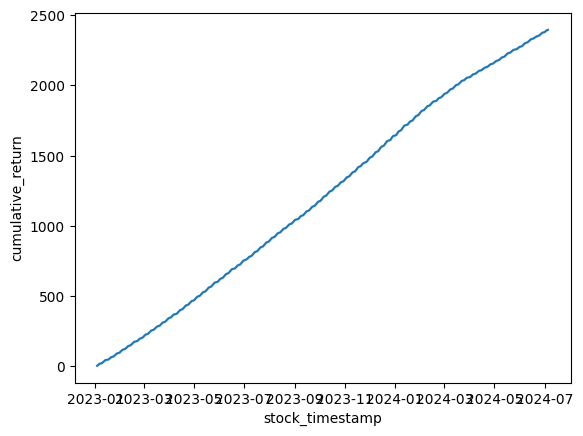

In [72]:
import seaborn as sns

con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

cum_over_time = """
SELECT stock_timestamp, cumulative_return, total_return
FROM StockMetric;
"""

df_cum_over_time = pandas.io.sql.read_sql(cum_over_time, con)

sns.lineplot(
    data =  df_cum_over_time,
    x='stock_timestamp',
    y='cumulative_return',
)

We can see from the steepnes of the line that our portfolio has started to do worse in recent days as the line is less steep indicating that the average return has dropped

### Next lets graph our Total return vs our anual return to see how our portfolio did each year compared to overall

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\3799223054.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_annual = pandas.io.sql.read_sql(annual_time, con)
C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\3799223054.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total = pandas.io.sql.read_sql(total_time, con)


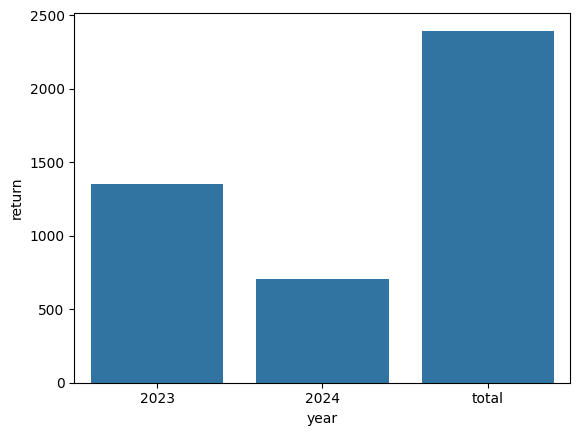

In [89]:
import matplotlib.pyplot as plt
con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

annual_time = """
SELECT annual_return, [year]
FROM FormattedPortMetrics;
"""
total_time = """
SELECT DISTINCT total_return
FROM FormattedPortMetrics;
"""

df_annual = pandas.io.sql.read_sql(annual_time, con)
df_annual = df_annual.iloc[1:3]
df_annual['return'] = df_annual['annual_return']
df_annual.drop(labels='annual_return', inplace=True, axis='columns')
df_total = pandas.io.sql.read_sql(total_time, con)
df_total['year'] = 'total'
df_total['return'] = df_total['total_return']
df_total.drop(labels='total_return', inplace=True, axis='columns')
df_annual_total = pd.concat([df_annual, df_total], axis=0)

sns.barplot(
    x='year',
    y='return',
    data=df_annual_total
)
plt.show()


As we can see our two years roughly add up to our total return values. It also appears that we did worse in 2024 than in 2023, but this is not true as 2024 only goes through early July rather than the whole year.
Considering we have approximatly half as many data points for 2024 than 2023 it would appear that we are doing about the same if not slightly better in 2024 than in 2023.

### Now lets graph our our volitility comparied to our market index volitility

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\1919340576.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_port_vol = pandas.io.sql.read_sql(port_vol, con)
C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\1919340576.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ind_vol = pandas.io.sql.read_sql(ind_vol, con)


<Axes: xlabel='stock_ticker', ylabel='volatility'>

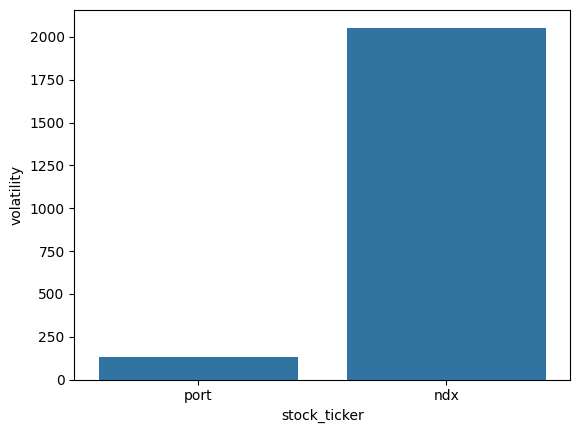

In [150]:
con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

port_vol = """
SELECT DISTINCT volatility
FROM FormattedPortMetrics;
"""
df_port_vol = pandas.io.sql.read_sql(port_vol, con)
df_port_vol['stock_ticker'] = 'port'

ind_vol = """
SELECT DISTINCT volitality
FROM IndexMetrics;
"""
df_ind_vol = pandas.io.sql.read_sql(ind_vol, con)
df_ind_vol['stock_ticker'] = 'ndx'
df_ind_vol['volatility'] = df_ind_vol['volitality']
df_ind_vol.drop(labels='volitality', inplace=True, axis='columns')

df_vol = pd.concat([df_port_vol, df_ind_vol], axis=0)

sns.barplot(
    x='stock_ticker',
    y='volatility',
    data=df_vol
)


From this we can see that our portfolio is much less volitile than the overall market which is good because that means we are makeing fairly safe investments.

### Now lets see what our Portfolio's sharpe ratio is

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\33206420.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_port_shar = pandas.io.sql.read_sql(port_sharpe, con)


<Axes: xlabel='portfolio', ylabel='sharpe_ratio'>

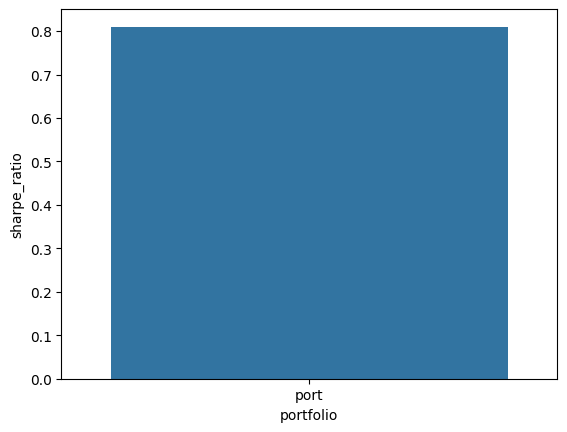

In [153]:
con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

port_sharpe = """
SELECT DISTINCT sharpe_ratio
FROM FormattedPortMetrics;
"""
df_port_shar = pandas.io.sql.read_sql(port_sharpe, con)
df_port_shar['portfolio'] = 'port'

sns.barplot(
    data=df_port_shar,
    x='portfolio',
    y='sharpe_ratio'
)

Knowing that a sharpe ratio of less than 1 is poor, we can see that overall our portfolio is doing poorly.

## Stocks and ETFs
### First lets graph our cumulative return over time to see how our return on Stocks and ETFs was over time.

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\666576546.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cum_over_time = pandas.io.sql.read_sql(cum_over_time, con)


<Axes: xlabel='stock_timestamp', ylabel='cumulative_return'>

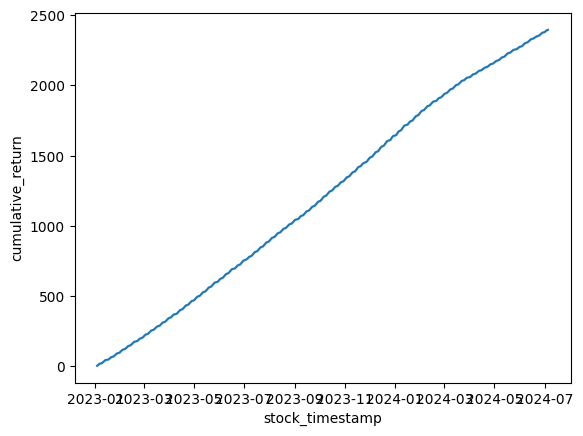

In [94]:
con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

cum_over_time = """
SELECT stock_timestamp, cumulative_return
FROM StockAndETFMetrics;
"""

df_cum_over_time = pandas.io.sql.read_sql(cum_over_time, con)

sns.lineplot(
    data =  df_cum_over_time,
    x='stock_timestamp',
    y='cumulative_return',
)

### Next lets graph our 10 day moving average, 100 day moving average, and our market index did over time to compare our averages to the market standard.

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\1682400989.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_moving = pandas.io.sql.read_sql(moving_avg, con)
C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\1682400989.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_market = pandas.io.sql.read_sql(market_idx, con)


<Axes: xlabel='stock_timestamp', ylabel='moving_average_10'>

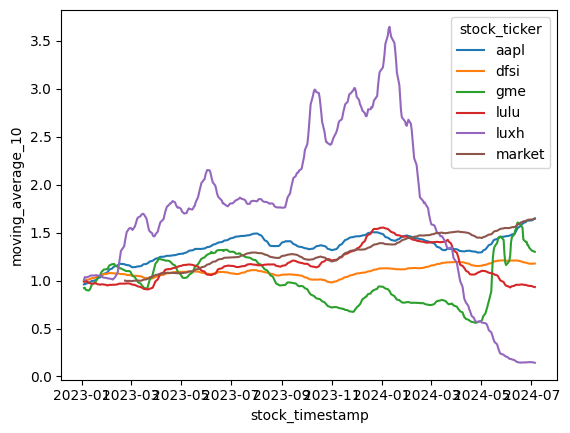

In [128]:
con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

moving_avg = """
SELECT stock_timestamp, moving_average_10, moving_average_100, stock_ticker
FROM StockAndETFMetrics
ORDER BY stock_timestamp;
"""
market_idx  = """
SELECT time_stamp, comparision_stockMarket10, comparision_stockMarket100
FROM IndexMetrics;
"""

df_moving = pandas.io.sql.read_sql(moving_avg, con)
df_market = pandas.io.sql.read_sql(market_idx, con)
df_market['stock_ticker'] = 'market'
df_market['moving_average_10'] = df_market['comparision_stockMarket10']
df_market['moving_average_100'] = df_market['comparision_stockMarket100']
df_market.drop(labels='comparision_stockMarket10', inplace=True, axis='columns')
df_market.drop(labels='comparision_stockMarket100', inplace=True, axis='columns')
df_market['stock_timestamp'] = df_market['time_stamp']
df_market.drop(labels='time_stamp', inplace=True, axis='columns')
df_moving_market = pd.concat([df_moving, df_market], axis=0)

sns.lineplot(
    data =  df_moving_market,
    x='stock_timestamp',
    y='moving_average_10',
    hue='stock_ticker'
)


From the 10 day average graph we can see that the luxh is a very volitile stock as the 10 day average return is constantly changing. We can also see that gme becomes fairly volitile towards the end of 2023 and through 2024 as there are a lot of large changes in the average return. Finally We can see that our other stocks are fairly "safe" stocks as they approximately followed the trend of the market index.

<Axes: xlabel='stock_timestamp', ylabel='moving_average_100'>

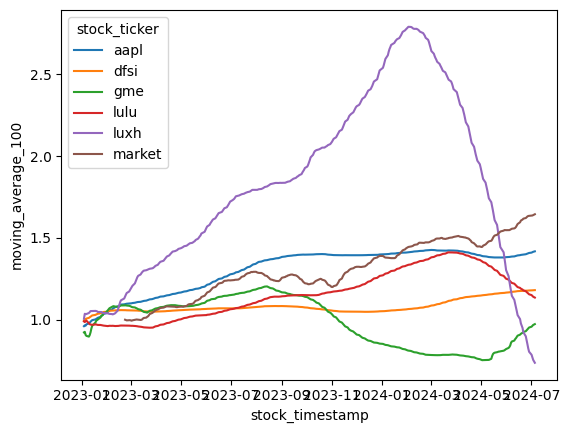

In [126]:
sns.lineplot(
    data =  df_moving_market,
    x='stock_timestamp',
    y='moving_average_100',
    hue='stock_ticker'
)

From this graph we can see that, both luxh and gme change a lot over the course of their 100 day averages. We can also see that lulu and aapl are the most stable and "safe" investments in relation to the Market index over a 100 day average. dfsi 100 day average stays fairly stable over the course of our investment, but this is not great as the market increased over the course of the investment

### Now lets graph our daily sharp ratio per stock and ETF over time to see how our stocks compared to eachother

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\3007279447.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sharpe = pandas.io.sql.read_sql(sharpe, con)


<Axes: xlabel='stock_timestamp', ylabel='sharpe_ratio'>

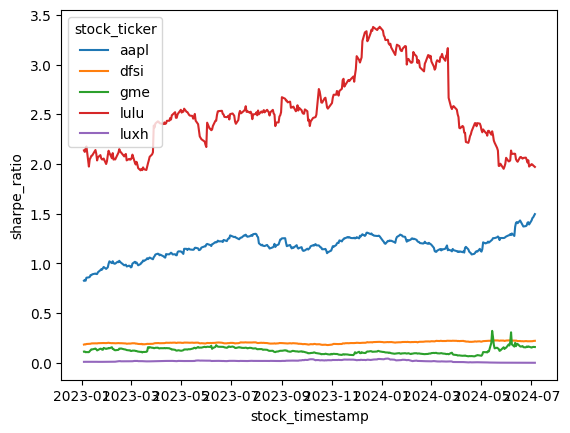

In [104]:
con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

sharpe = """
SELECT stock_timestamp, sharpe_ratio, stock_ticker
FROM StockAndETFMetrics
ORDER BY stock_timestamp;
"""

df_sharpe = pandas.io.sql.read_sql(sharpe, con)

sns.lineplot(
    data =  df_sharpe,
    x='stock_timestamp',
    y='sharpe_ratio',
    hue='stock_ticker'
)

From this graph we can see which of our stocks and ETFs had a high enough return to be worth the instability. Knowing that a sharpe ratio of less than 1 is poor, we can see that gme, dfsi, and luxh are under preforming at all less than .5 consistently. We can also see that aaple and lulu are very good stocks to invest in.


## Indices

### Now lets graph our total stockmarket Index and our price index over time

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\1113923897.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_price_indx = pandas.io.sql.read_sql(price_indx, con)
C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\1113923897.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_market_indx = pandas.io.sql.read_sql(market_indx, con)


<Axes: xlabel='time_stamp', ylabel='index'>

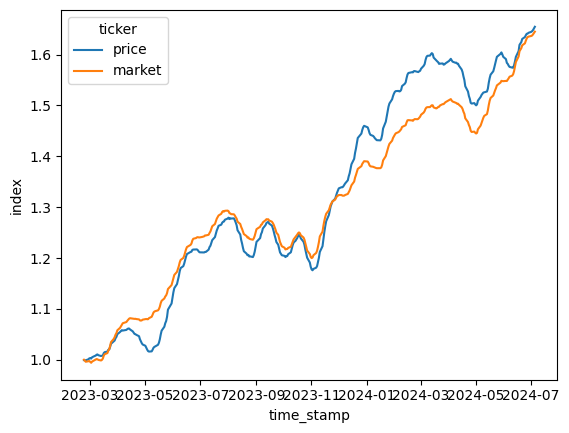

In [133]:
con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

price_indx = """
SELECT time_stamp, price_index
FROM IndexMetrics;
"""
market_indx = """
SELECT time_stamp, comparision_stockMarket10
FROM IndexMetrics;
"""

df_price_indx = pandas.io.sql.read_sql(price_indx, con)
df_price_indx['ticker'] = 'price'
df_price_indx['index'] = df_price_indx['price_index']
df_price_indx.drop(labels='price_index', inplace=True, axis='columns')

df_market_indx = pandas.io.sql.read_sql(market_indx, con)
df_market_indx['ticker'] = 'market'
df_market_indx['index'] = df_market_indx['comparision_stockMarket10']
df_market_indx.drop(labels='comparision_stockMarket10', inplace=True, axis='columns')

df_market_price = pd.concat([df_price_indx, df_market_indx], axis=0)

sns.lineplot(
    data =  df_market_price,
    x='time_stamp',
    y='index',
    hue='ticker'
)

From this graph we can see that the market price and Whole Market Index followed almost the same trend over the course of our investment.

## Forex
### First lets graph our cumulative return over time

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\1194922861.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_forex_cum_ret = pandas.io.sql.read_sql(forex_cum, con)


<Axes: xlabel='eurousd_timestamp', ylabel='cumulative_return'>

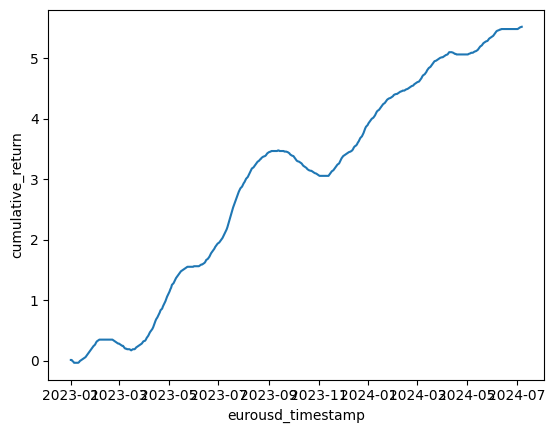

In [136]:
con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

forex_cum = """
SELECT cumulative_return, eurousd_timestamp
FROM forexMetrics;
"""

df_forex_cum_ret = pandas.io.sql.read_sql(forex_cum, con)

sns.lineplot(
    data =  df_forex_cum_ret,
    x='eurousd_timestamp',
    y='cumulative_return'
)

From this graph we can see that over the course of our investment we consistantly made money. We can also see that there were periods during our investment period where we lost money, but the overall trend was positive.

### Next lets graph our percent change over time so that we can see how the exchange rate fluxtuated

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\2811867374.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_forex_cum_ret = pandas.io.sql.read_sql(forex_cum, con)


<Axes: xlabel='eurousd_timestamp', ylabel='percent_change'>

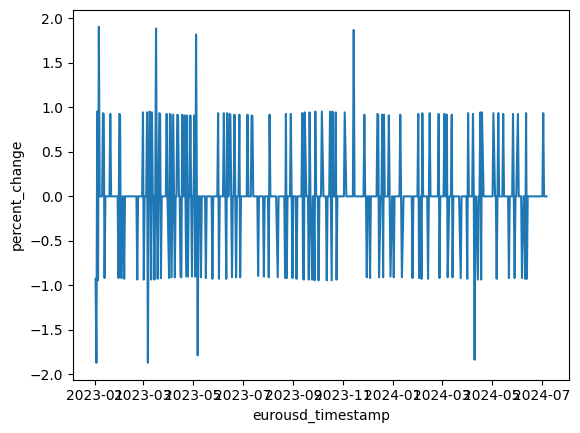

In [137]:
con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

forex_cum = """
SELECT percent_change, eurousd_timestamp
FROM forexMetrics;
"""

df_forex_cum_ret = pandas.io.sql.read_sql(forex_cum, con)

sns.lineplot(
    data =  df_forex_cum_ret,
    x='eurousd_timestamp',
    y='percent_change'
)

From this fairly chaotic graph was can see that the Euro USD exchange rate was almost constantly fluctuating between positive and negative amounts of about 1 % with a few spikes both up and down to approximately 2%.

## Overall

### Finally lets graph the total return per stock, ETF, and Forex to see how each aspect of our portfolio did individually

C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\3974406356.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_forex_tot = pandas.io.sql.read_sql(forex_tot, con)
C:\Users\asmit\AppData\Local\Temp\ipykernel_26088\3974406356.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_stock_etf_tot= pandas.io.sql.read_sql(stock_etf_tot, con)


<Axes: xlabel='stock_ticker', ylabel='total_return'>

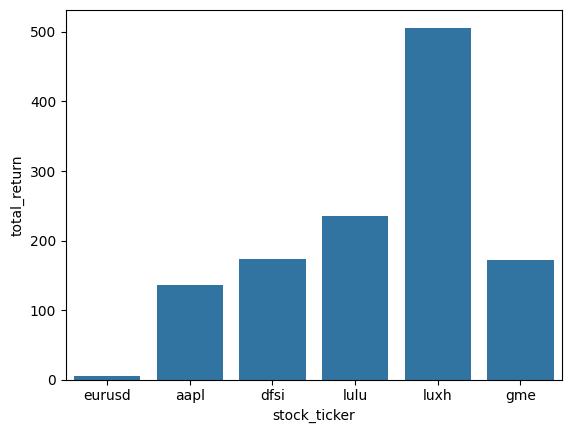

In [ ]:
con = pymssql.connect(server='WINDOWS-7KG9G4T', database='portfolio')
cursor = con.cursor()

forex_tot = """
SELECT DISTINCT total_return
FROM forexMetrics;
"""
df_forex_tot = pandas.io.sql.read_sql(forex_tot, con)
df_forex_tot['stock_ticker'] = 'eurusd'

stock_etf_tot = """
SELECT DISTINCT stock_ticker, total_return
FROM StockAndETFMetrics;
"""
df_stock_etf_tot= pandas.io.sql.read_sql(stock_etf_tot, con)

df_total_return = pd.concat([df_forex_tot, df_stock_etf_tot], axis=0)

sns.barplot(
    data =  df_total_return,
    x='stock_ticker',
    y='total_return'
)

From this graph it looks like I should have purchased more luxh stock as it was my highest return. However, from looking at the other graphs it is clear that I should have bought more luxh and then sold the shares in early 2024 when the stock returns tanked. I should have then taken the money made from selling my luxh stock and bough more aapl and dfsi stocks. Look at this portfolio in total for the course of the investment period I also should begin selling my lulu shares as the returns on lulu are going down on average.